In [209]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
data = pd.read_csv(r'F:\pdf\ta\train.csv')
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


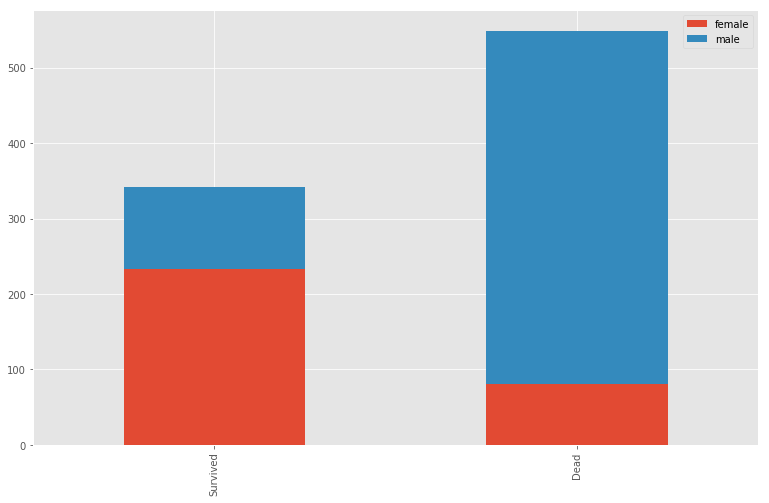

In [211]:
data['Age'].fillna(data['Age'].median(), inplace=True)
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
#stacked设置为True，堆叠数据
df.plot(kind='bar',stacked=True, figsize=(13,8))
plt.show()

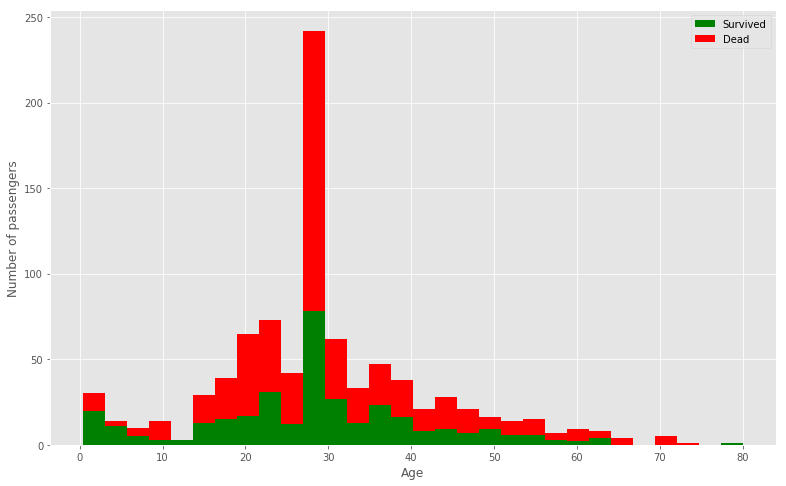

In [212]:
figure = plt.figure(figsize=(13,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

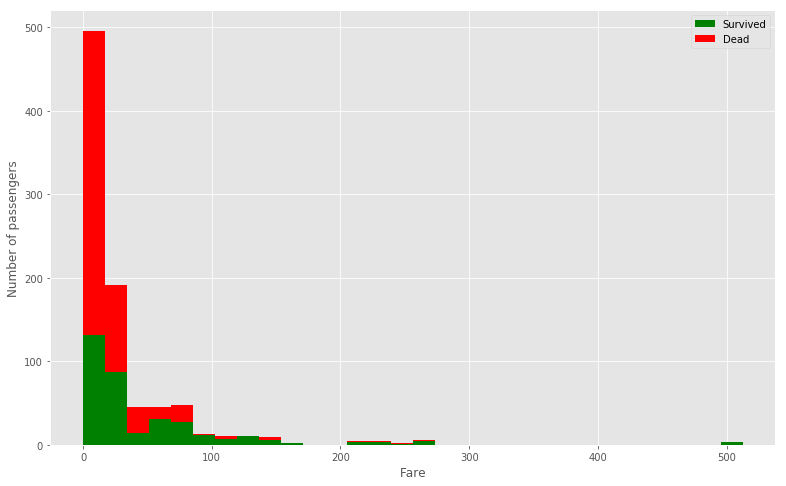

In [213]:
figure = plt.figure(figsize=(13,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

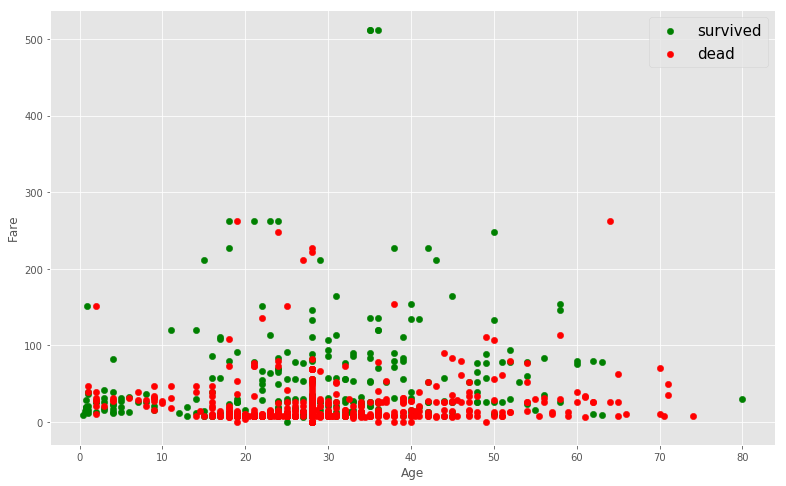

In [214]:
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)
plt.show()

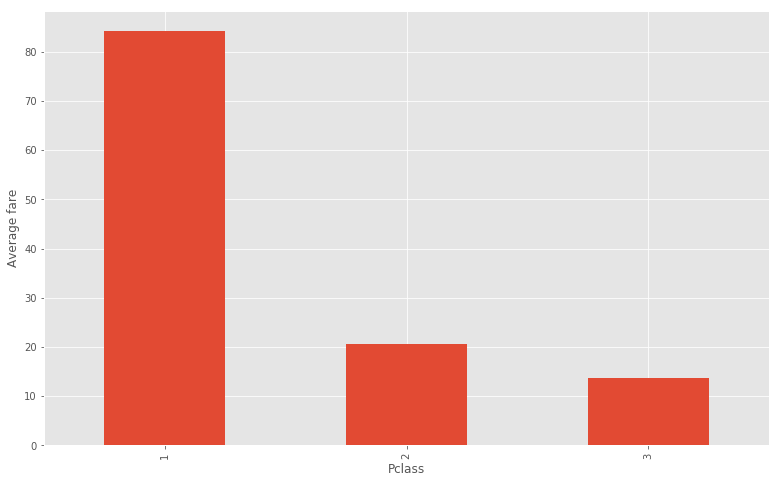

In [215]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(13,8), ax = ax)
plt.show()

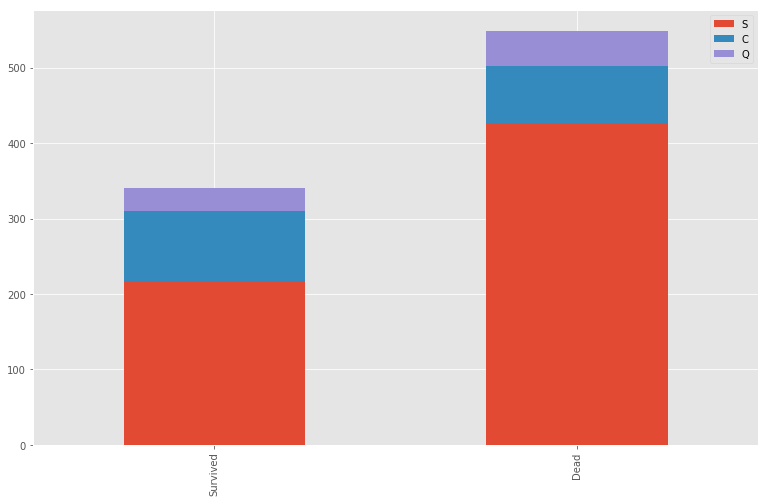

In [216]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))
plt.show()

In [217]:
def status(feature):

    print('Processing',feature,': ok')
def get_combined_data():
    #去掉SURRIVED,将train和test组成新数据
    train = pd.read_csv(r'F:\pdf\ta\train.csv')
    test = pd.read_csv(r'F:\pdf\ta\test.csv')
    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined


combined = get_combined_data()
combined.shape
combined.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
def get_titles():

    global combined
    
    # 也可以用正则表达式
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
get_titles()

In [219]:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [220]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [221]:
process_age()
combined.head()

Processing age : ok


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [222]:
def process_names():
    #用onehot对title进行编码
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')
process_names()
combined.head()

Processing names : ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [223]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    
    status('fare')
process_fares()

Processing fare : ok


In [224]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [225]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')
process_embarked()

Processing embarked : ok


In [226]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')
process_cabin()


Processing cabin : ok


In [227]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')
process_sex()

Processing sex : ok


In [228]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,1,22.0,1,0,A/5 21171,7.2500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,3,1,35.0,0,0,373450,8.0500,0,0,...,1,0,0,0,0,0,0,0,0,1


In [229]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [230]:
def process_ticket():
    
    global combined
    
    # map对象的查看
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        ticket=list(ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')
process_ticket()

Processing ticket : ok


In [231]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')
process_family()

Processing family : ok


In [232]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,3,1,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,2,0,1,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,1,2,0,1,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,1,1,0,0


In [233]:
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print('Features scaled successfully !')
scale_all_features()

Features scaled successfully !


In [234]:
finish_combined=combined.copy()

In [235]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1.000000,1.0,0.2750,0.125,0.0,0.014151,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
1,2,0.333333,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
2,3,1.000000,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0
3,4,0.333333,0.0,0.4375,0.125,0.0,0.103644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
4,5,1.000000,1.0,0.4375,0.000,0.0,0.015713,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0


In [236]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [305]:
def compute_score(clf, X, y,scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5,scoring=scoring)
    return np.mean(xval)
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv(r'F:\pdf\ta\train.csv')
    
    targets = train0.Survived
    #函数更新
    train = combined.iloc[0:891]
    train.drop('PassengerId',axis=1,inplace=True)
    test = combined.iloc[891:]
    testID=test.PassengerId
    test.drop('PassengerId',axis=1,inplace=True)
    
    return train,test,targets,testID
train,test,targets,testID=recover_train_test_target()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [250]:
targets.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


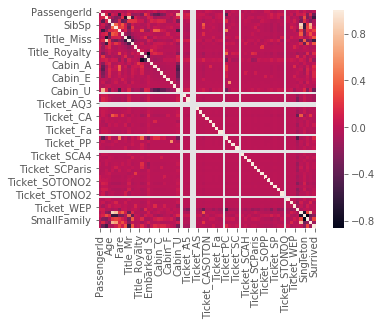

In [251]:
import seaborn as sns
corrmat_data=pd.concat(([train,targets]))
#corrmat_data['Surrived']=targets
#corrmat = corrmat_data.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);
plt.show()

In [252]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)
features=pd.DataFrame()

features['feature']=train.columns
features['importance']=clf.feature_importances_

In [254]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
891,1.000000,1.0,0.43125,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
892,1.000000,0.0,0.58750,0.125,0.000000,0.013663,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
893,0.666667,1.0,0.77500,0.000,0.000000,0.018909,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
894,1.000000,1.0,0.33750,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
895,1.000000,0.0,0.27500,0.125,0.111111,0.023984,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.272727,0.0,1.0,0.0


In [255]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
test_new = model.transform(test)

In [256]:
forest = RandomForestClassifier(max_features='sqrt')
parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': list(range(200,300,10)),
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(train_new, targets)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8338945005611672
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 270}


In [257]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
train_x,test_x,train_y,test_y=train_test_split(train,targets,train_size=0.9)

lr = LogisticRegressionCV(cv=5, penalty='l2',solver='lbfgs',tol=0.01)
lr.fit(train_x,train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [259]:
lr.score(test_x,test_y)

0.81111111111111112

In [260]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
forest.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [261]:
forest.score(test_x,test_y)

0.74444444444444446

In [262]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel='poly')
svm.fit(train_x,train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [263]:
svm.score(test_x,test_y)

0.55555555555555558

In [264]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [265]:
grad.score(test_x,test_y)

0.84444444444444444

In [266]:
test_x.shape,train_x.shape

((90, 65), (801, 65))

In [267]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,learning_curve
kfold = StratifiedKFold(n_splits=10)
train_x=train
train_y=targets
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier
          (random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [268]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,train_x, y = train_y,scoring = "accuracy", cv = kfold, n_jobs=4))

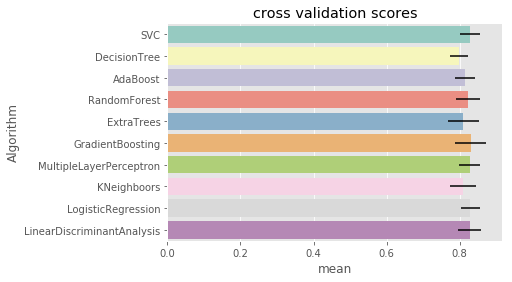

In [269]:
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(np.mean(cv_result))
    cv_std.append(np.std(cv_result))
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                            "Algorithm":["SVC","DecisionTree","AdaBoost",
         "RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron",
         "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})
g=sns.barplot('CrossValMeans','Algorithm',data=cv_res,palette='Set3',orient = "h",**{'xerr':cv_std})
g.set_xlabel('mean')
g=g.set_title('cross validation scores')
plt.show()

In [270]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.829397,0.026994
1,DecisionTree,0.798023,0.024658
2,AdaBoost,0.814890,0.028532
3,RandomForest,0.822680,0.033205
4,ExtraTrees,0.810420,0.042711
5,GradientBoosting,0.830633,0.042574
6,MultipleLayerPerceptron,0.827200,0.029165
7,KNeighboors,0.809284,0.036090
8,LogisticRegression,0.829422,0.026349
9,LinearDiscriminantAnalysis,0.828311,0.031650


In [271]:
#模型参数调整
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)
#设置各个参数的组合
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold,scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(train_x,train_y)
ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   13.7s finished


In [272]:
ExtC = ExtraTreesClassifier()
# 优化决策树算法参数设置
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, 
                                    scoring="accuracy", n_jobs= 4, verbose = 1)
#应用到训练集上去
gsExtC.fit(train_x,train_y)
ExtC_best = gsExtC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.4min finished


In [273]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC=GridSearchCV(RFC,param_grid = rf_param_grid,cv=kfold,scoring='accuracy',n_jobs = 4,verbose = 1)
gsRFC.fit(train_x,train_y)


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [False], 'n_estimators': [100, 300], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [274]:
RFC_best = gsRFC.best_estimator_

In [275]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid,cv = kfold, scoring = 'accuracy', n_jobs = 4,verbose = 1)
gsGBC.fit(train_x,train_y)
GBC_best = gsGBC.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   30.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   43.6s finished


In [276]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, 
                             scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(train_x,train_y)
SVMC_best = gsSVMC.best_estimator_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   42.5s finished


In [277]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('training examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    #填充曲线标准差的范围
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #绘制训练集得分
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    #绘制验证集得分
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")   
    plt.legend(loc="best")
    
    return plt    
    

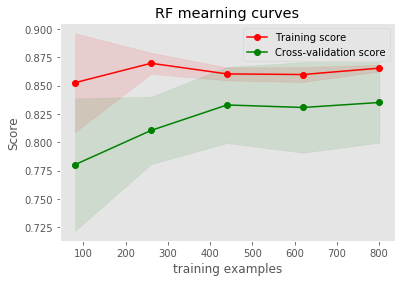

In [278]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",
                                                   train_x,train_y,cv=kfold)
plt.show()

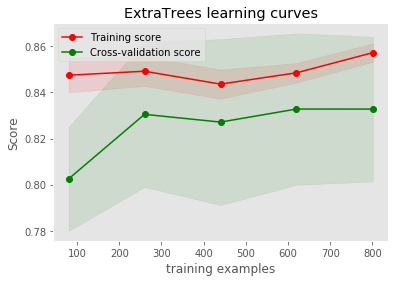

In [279]:
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",
                                                   train_x,train_y,cv=kfold)
plt.show()

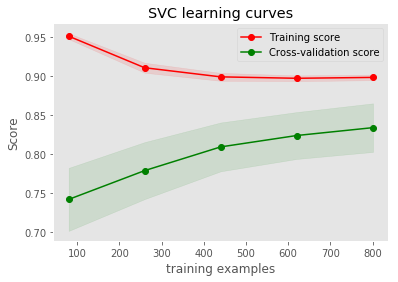

In [280]:
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",
                                                   train_x,train_y,cv=kfold)
plt.show()

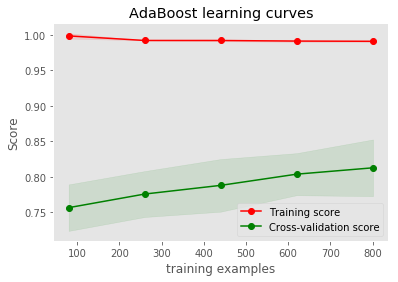

In [281]:
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",
                                                   train_x,train_y,cv=kfold)
plt.show()

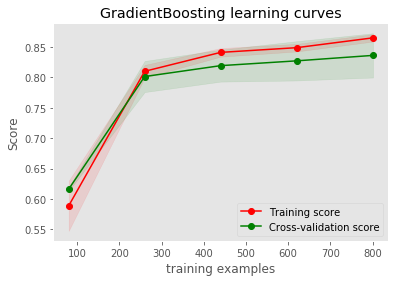

In [282]:
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",
                                                   train_x,train_y,cv=kfold)
plt.show()

In [283]:
ada_best

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.1, n_estimators=2, random_state=7)

In [284]:
nrows = ncols = 2
names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),
                   ("RandomForest",RFC_best),("GradientBoosting",GBC_best)]
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        #先根据classifier.feature_importances_的值进行降序排列，然后取前40
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        #绘制柱状图，y轴对应特征列的名称，x轴则表明特征列所占的重要程度比例
        g = sns.barplot(y=train_x.columns[indices][:40],
                        x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

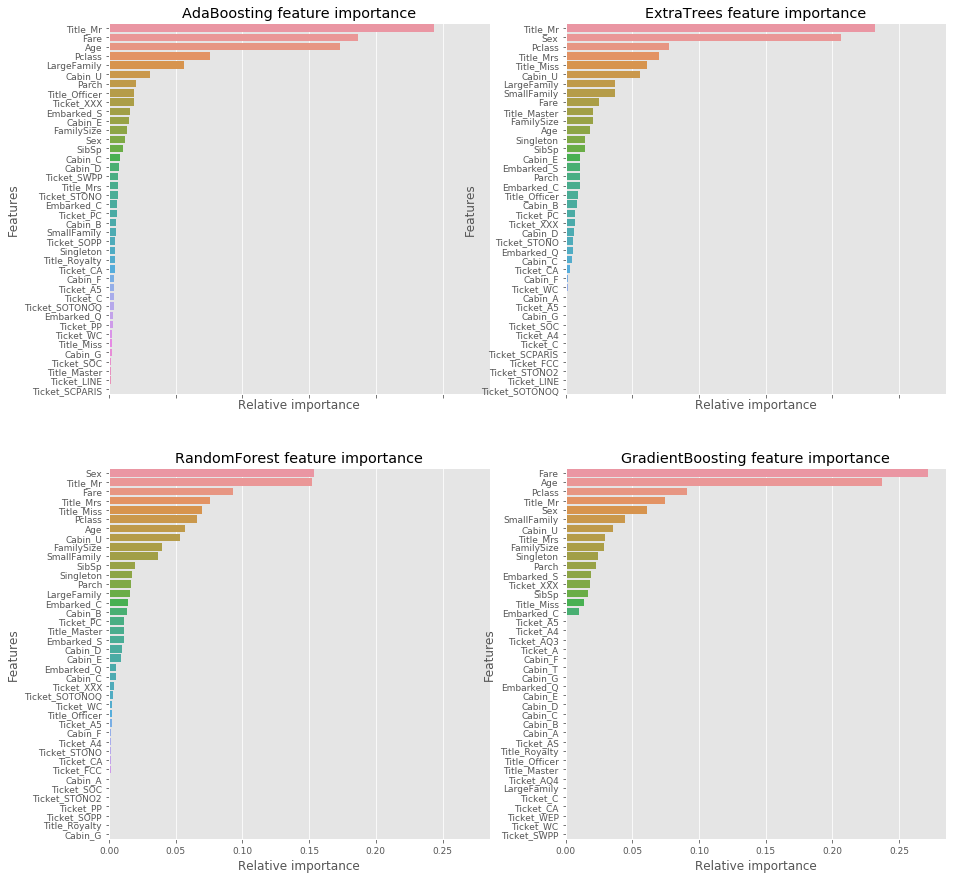

In [285]:
plt.show()

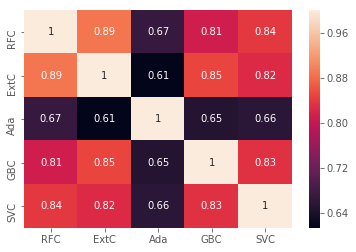

In [286]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,
                 test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)
plt.show()

In [312]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),
('svc', SVMC_best), ('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(train_x, train_y)

In [306]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
891,1.000000,1.0,0.43125,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
892,1.000000,0.0,0.58750,0.125,0.000000,0.013663,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
893,0.666667,1.0,0.77500,0.000,0.000000,0.018909,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
894,1.000000,1.0,0.33750,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0
895,1.000000,0.0,0.27500,0.125,0.111111,0.023984,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.272727,0.0,1.0,0.0


In [313]:
test0 = pd.read_csv(r'F:\pdf\ta\test.csv')
test0.PassengerId
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results = pd.concat([test0.PassengerId,test_Survived],axis=1)
results.to_csv(r'F:\pdf\ta\ensemble_python_voting.csv',index=False)